In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

calendar = pd.read_csv('./seattle/calendar.csv')
listings = pd.read_csv('./seattle/listings.csv')
reviews = pd.read_csv('./seattle/reviews.csv')

In [2]:
# Import Functions from Udacity Data Scientist Nanodegree course 
def clean_fit_linear_mod(df, response_col, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Code adapted from Udacity Data Scientist Nanodegree course 
    '''
    #Copy the dataframe
    df = df.copy()
    
    #Get catagorical columns from the dataframe
    cat_cols = df.select_dtypes(include=['object']).columns

    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)
    
    #Dummy categorical variables
    df = pd.get_dummies(df, prefix=cat_cols)
    
    # Fill the mean
    df = df.fillna(df.mean())

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

In [3]:
print(listings.shape)
listings.head()

(3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [5]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [6]:
# Remove columns I don't care about (have no effect on data, will cause overfitting)

df = listings.copy()
# keep_cols = [
#        'host_response_time',
#        'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
#        'host_listings_count', 'host_total_listings_count',
#        'host_verifications', 'neighbourhood_group_cleansed',
#        'is_location_exact', 'property_type', 'room_type', 'accommodates',
#        'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
#        'price', 'security_deposit', 'cleaning_fee', 
#        'guests_included', 'extra_people', 'minimum_nights',
#        'maximum_nights', 'availability_365', 'number_of_reviews', 
#        'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
#        'review_scores_checkin', 'review_scores_communication',
#        'review_scores_location', 'review_scores_value', 'requires_license',
#        'license', 'instant_bookable', 'cancellation_policy', 
#        'require_guest_profile_picture', 'require_guest_phone_verification',
#        'calculated_host_listings_count', 'reviews_per_month'
#        ]
keep_cols = [
       'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_verifications', 'neighbourhood_group_cleansed',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'square_feet',
       'price', 'security_deposit', 'cleaning_fee', 
       'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews', 
       'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'license', 'instant_bookable', 'cancellation_policy', 
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month'
       ]
# keep_cols = [
#        'host_response_time', 'host_is_superhost',
#        'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
#        'neighbourhood_group_cleansed',
#        'property_type', 'room_type', 'accommodates',
#        'bathrooms', 'bedrooms', 'beds', 'bed_type', 'square_feet',
#        'price', 'security_deposit', 'cleaning_fee', 'number_of_reviews',
#        'review_scores_rating', 'review_scores_value', 'availability_365'
#        ]

df = df[keep_cols]

df.head()


,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,...,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,within a few hours,96%,100%,f,"['email', 'phone', 'reviews', 'kba']",Queen Anne,t,Apartment,Entire home/apt,4,...,9.0,10.0,f,NaN,f,moderate,f,f,2,4.07
1,within an hour,98%,100%,t,"['email', 'phone', 'facebook', 'linkedin', 're...",Queen Anne,t,Apartment,Entire home/apt,4,...,10.0,10.0,f,NaN,f,strict,t,t,6,1.48
2,within a few hours,67%,100%,f,"['email', 'phone', 'google', 'reviews', 'jumio']",Queen Anne,t,House,Entire home/apt,11,...,10.0,10.0,f,NaN,f,strict,f,f,2,1.15
3,NaN,NaN,NaN,f,"['email', 'phone', 'facebook', 'reviews', 'jum...",Queen Anne,t,Apartment,Entire home/apt,3,...,NaN,NaN,f,NaN,f,flexible,f,f,1,NaN
4,within an hour,100%,NaN,f,"['email', 'phone', 'facebook', 'reviews', 'kba']",Queen Anne,t,House,Entire home/apt,6,...,9.0,9.0,f,NaN,f,strict,f,f,1,0.89


In [7]:
# Clean up the typing of columns
def parse_dollar(x):
    if not pd.isnull(x):
#         print(x)
        return float(x[1:].replace(',', ''))
    else:
        return None
    
def parse_percent(x):
    if not pd.isnull(x):
        return float(x[:-1])
    else:
        return None

# parse dollar columns and convert to float
dollar_cols = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']

for col in dollar_cols:
    try:
        df[col] = df[col].apply(parse_dollar)              
    except KeyError:
        pass

# # parse percent columns and convert to float
percent_cols = ['host_response_rate', 'host_acceptance_rate']


for col in percent_cols:
    try:
        df[col] = df[col].apply(parse_percent)
    except KeyError:
        pass
    
df.describe()

,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,square_feet,price,security_deposit,cleaning_fee,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3295.000000,3045.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,1866.000000,2788.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,94.886798,99.967159,3.349398,1.259469,1.307712,1.735394,854.618557,127.976166,287.610397,61.710904,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,11.866705,1.812201,1.977599,0.590369,0.883395,1.139480,671.404893,90.250022,270.222690,48.830341,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,17.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,95.000000,5.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,98.000000,100.000000,2.000000,1.000000,1.000000,1.000000,420.000000,75.000000,150.000000,25.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,100.000000,100.000000,3.000000,1.000000,1.000000,1.000000,750.000000,100.000000,250.000000,50.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,100.000000,100.000000,4.000000,1.000000,2.000000,2.000000,1200.000000,150.000000,300.000000,83.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,100.000000,100.000000,16.000000,8.000000,7.000000,15.000000,3000.000000,1000.000000,5000.000000,300.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [8]:
### Q1
example_property = df.loc[(df['neighbourhood_group_cleansed'] == 'Queen Anne')]
example_property = example_property.loc[(df['bedrooms'] == 2) & (df['bathrooms'] == 2)]
example_property['price'].describe()

count     13.000000
mean     231.307692
std       72.693861
min      115.000000
25%      180.000000
50%      200.000000
75%      275.000000
max      349.000000
Name: price, dtype: float64

In [25]:
### Q2a
df_corr = df.corr()
df_corr = df_corr['availability_365'].round(2)
df_corr = pd.DataFrame({'correlation': df_corr, 'magnitude': df_corr.apply(np.abs)})
df_corr.sort_values('magnitude', ascending=False)['correlation'].head(11)[1:]
# sns.heatmap(df_choice.corr(), annot=True, fmt=".2f");

calculated_host_listings_count    0.14
host_response_rate               -0.09
number_of_reviews                 0.09
review_scores_value              -0.07
cleaning_fee                      0.06
guests_included                  -0.05
bedrooms                         -0.05
review_scores_rating             -0.04
review_scores_accuracy           -0.04
square_feet                       0.03
Name: correlation, dtype: float64

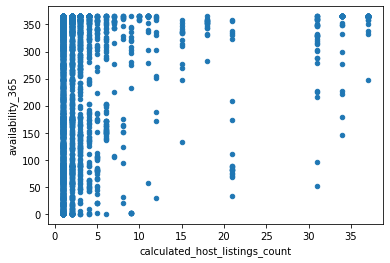

In [32]:
### Q2b
df.plot(x='calculated_host_listings_count', y='availability_365', kind='scatter').get_figure().savefig('Q2b.png')

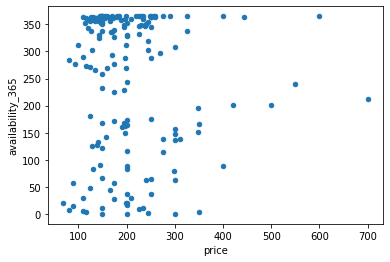

In [35]:
### Q3a
example_property = df.loc[(df['bedrooms'] == 2) & (df['bathrooms'] == 2)]
example_property.plot(x='price', y='availability_365', kind='scatter').get_figure().savefig('Q3a.png')

In [28]:
# Train the model
response_col = 'availability_365'
dummy_na = False
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df, response_col, dummy_na)
test_score, train_score

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_base.py:533: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


(-3.354562307048415e+26, 0.18571100571165755)

In [29]:
# Calculate the coefficient weights of the model
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
128,"host_verifications_['google', 'jumio']",4.236452e+16,4.236452e+16
57,"host_verifications_['email', 'phone', 'faceboo...",3.412378e+16,3.412378e+16
120,"host_verifications_['email', 'phone', 'reviews...",3.206130e+16,3.206130e+16
48,"host_verifications_['email', 'phone', 'faceboo...",2.492824e+16,2.492824e+16
74,"host_verifications_['email', 'phone', 'faceboo...",-2.376444e+16,2.376444e+16
85,"host_verifications_['email', 'phone', 'google'...",-2.148259e+16,2.148259e+16
172,property_type_Dorm,1.146790e+16,1.146790e+16
216,extra_people_$44.00,-1.024861e+16,1.024861e+16
30,"host_verifications_['email', 'facebook', 'goog...",-9.996328e+15,9.996328e+15
65,"host_verifications_['email', 'phone', 'faceboo...",9.978272e+15,9.978272e+15
